This is a test notebook to experiment with `iminuit`. First, see how it works with a linear regression problem. 
Then fit a simple dipole, and finally perform the dipole with integration of pos-neg image data 
(where those images have a steep gradient). 

In [9]:
from iminuit import Minuit
def f(x, y, z):
    return (x - 2) ** 2 + (y - 3) ** 2 + (z - 4) ** 2
m = Minuit(f)
m.migrad()
print(m.values)  # {'x': 2,'y': 3,'z': 4}
print(m.errors)  # {'x': 1,'y': 1,'z': 1}

FCN = 1.62389076464e-22 
 TOTAL NCALL = 36 
 NCALLS = 36 
 
 
 EDM = 1.62388025554e-22 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,x,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,,,
2,y,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,,,
3,z,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,,,


{'y': 3.000000000007099, 'x': 2.0000000000047327, 'z': 4.000000000009465}
{'y': 1.0000000000002762, 'x': 1.0000000000000409, 'z': 0.9999999999998322}


In [10]:
%pylab inline

import numpy as np
np.random.seed(666)

import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [6]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from iminuit import Minuit
from probfit import UnbinnedLH, gaussian
data = np.random.randn(10000)
def fitFunc(data):
    unbinned_likelihood = UnbinnedLH(gaussian, data)
    minuit = Minuit(unbinned_likelihood, mean=1.1, sigma=3.1, print_level=0)
    minuit.migrad()
    return minuit
%timeit fitFunc(data)
#minuit = fitFunc(data)
#_ = unbinned_likelihood.draw(minuit);

10 loops, best of 3: 89.5 ms per loop


The following is from http://nbviewer.jupyter.org/github/iminuit/probfit/blob/master/tutorial/tutorial.ipynb

In [16]:
# We assume you have executed this cell in all the following examples
import numpy as np
import matplotlib.pyplot as plt
import iminuit
import probfit

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

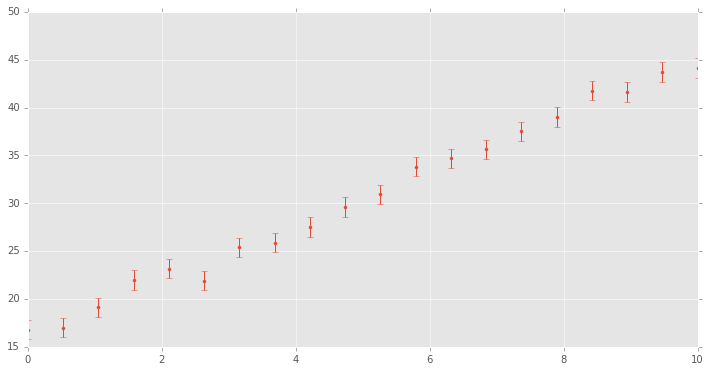

In [17]:
# Let's make a straight line with gaussian(mu=0, sigma=1) noise
np.random.seed(0)
x = np.linspace(0, 10, 20) 
y = 3 * x + 15 + np.random.randn(len(x))
err = np.ones(len(x))
plt.errorbar(x, y, err, fmt='.');

In [99]:
# Let's define our line.
# First argument has to be the independent variable,
# arguments after that are shape parameters.
def line(x, m, c): # define it to be parabolic or whatever you like
    return m * x + c

In [100]:
iminuit.describe(line)

['x', 'm', 'c']

In [112]:
# Define a chi^2 cost function
# Note this is a problem because it does not vectorize the call to `line`.
chi2obj = probfit.Chi2Regression(line, x, y, err)

In [113]:
# Chi2Regression is just a callable object; nothing special about it
iminuit.describe(chi2obj)

['m', 'c']

In [114]:
# minimize it
# yes, it gives you a heads up that you didn't give it initial value
# we can ignore it for now
def fitIt(print_level=0):
    chi2obj = probfit.Chi2Regression(line, x, y, err)
    minuit = iminuit.Minuit(chi2obj, print_level=print_level) # see iminuit tutorial on how to give initial value/range/error
    out = minuit.migrad()  # MIGRAD is a very stable robust minimization method
    return out, minuit
%timeit fitIt()
out, minuit = fitIt(print_level=1)

1000 loops, best of 3: 267 µs per loop


FCN = 12.0738531135 
 TOTAL NCALL = 36 
 NCALLS = 36 
 
 
 EDM = 1.10886029888e-21 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,m,2.886277e+00,7.367884e-02,0.000000e+00,0.000000e+00,,,
2,c,1.613795e+01,4.309458e-01,0.000000e+00,0.000000e+00,,,


In [229]:
# Try it by defining our own vectorized chi2 function. This should be faster.
from iminuit.util import make_func_code
class Chi2Functor:
    def __init__(self, f, x, y, err=1.):
        self.f = f
        self.x = x
        self.y = y
        self.err = err**2.
        f_sig = iminuit.describe(f)
        # this is how you fake function signature dynamically
        self.func_code = iminuit.util.make_func_code(f_sig[1:]) # docking off independent variable
        self.func_defaults = None # this keeps np.vectorize happy
    def __call__(self, *arg):
        # notice that it accept variable length positional arguments
        #chi2 = sum((y - self.f(x, *arg))**2 for x,y in zip(self.x, self.y))
        f_val = self.f(self.x, *arg)
        #f_val -= self.y
        #f_val **= 2.
        #f_val /= self.err
        #chi2 = np.sum(f_val)
        chi2 = np.sum(((self.y - f_val)**2.)/self.err)
        return chi2

def line(x, m, c): # define it to be parabolic or whatever you like
    return x * m + c

chi2obj = Chi2Functor(line, x, y, 1.)
print iminuit.describe(chi2obj)
    
def fitIt(print_level=0):
    chi2obj = Chi2Functor(line, x, y, 1.)
    minuit = iminuit.Minuit(chi2obj, print_level=print_level) 
    out = minuit.migrad()  # MIGRAD is a very stable robust minimization method
    return out, minuit
%timeit fitIt()
out, minuit = fitIt(print_level=1)

['m', 'c']
1000 loops, best of 3: 445 µs per loop


FCN = 12.0738531135 
 TOTAL NCALL = 36 
 NCALLS = 36 
 
 
 EDM = 6.7673726981e-22 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,m,2.886277e+00,7.367884e-02,0.000000e+00,0.000000e+00,,,
2,c,1.613795e+01,4.309458e-01,0.000000e+00,0.000000e+00,,,


In [168]:
# The output above is a pretty-printed summary of the fit results from
# minuit.print_fmin()
# which was automatically called by iminuit.Minuit.migrad() after running MIGRAD.

# Let's see our results as Python dictionaries ...
print(minuit.values)
print(minuit.errors)

{'c': 16.13794752053587, 'm': 2.886277414482587}
{'c': 0.4309458040626655, 'm': 0.07367883980858407}


In [70]:
# Let's visualize our line
_ = chi2.draw(minuit);
# looks good;

AttributeError: type object 'chi2' has no attribute 'draw'

In [169]:
# Sometimes we want the error matrix (a.k.a. covariance matrix)
print('error matrix:')
print(minuit.matrix())
# or the correlation matrix
print('correlation matrix:')
print(minuit.matrix(correlation=True))
# or a pretty html representation
# Note that `print_matrix()` shows the correlation matrix, not the error matrix
minuit.print_matrix()

error matrix:
((0.005428571435538993, -0.027142857196837174), (-0.027142857196837174, 0.1857142860392173))
correlation matrix:
((1.0, -0.8548504146687476), (-0.8548504146687476, 1.0))


+,m,c
m,1.00,-0.85
c,-0.85,1.00


Now we try to fit our dipole...

In [220]:
import lmfit
from scipy.stats import norm

def gen_dipole2(x, amp1=1., sep1=1.):
    ypos = amp1 * norm.pdf(x,  sep1/2., 1)
    yneg = amp1 * norm.pdf(x, -sep1/2., 1)                  
    y = ypos - yneg
    return np.append(y, [ypos, yneg])

def gen_dipole(x, amp1=1., sep1=1.):
    #y = amp1 * (norm.pdf(x, -sep1/2., 1) - norm.pdf(x, sep1/2., 1))
    try:
        leng = len(x)
    except:
        leng = 1
    y = gen_dipole2(x, amp1, sep1)[:leng]
    return y

def fitDipole(ydata, xdata, amp1Start=3., sep1Start=2., fitFunc=gen_dipole, err=1., verbose=False):
    gmod = lmfit.Model(fitFunc, verbose=verbose)
    result = gmod.fit(ydata, x=xdata, amp1=amp1Start, sep1=sep1Start, weights=1./err, verbose=verbose)

    if verbose: 
        print(result.fit_report(show_correl=False))
        ci = lmfit.conf_interval(result, result)
        lmfit.printfuncs.report_ci(ci)

    return result

 - Adding parameter "sep1"
 - Adding parameter "amp1"
[[Model]]
    Model(gen_dipole)
[[Fit Statistics]]
    # function evals   = 51
    # data points      = 40
    # variables        = 2
    chi-square         = 34.051
    reduced chi-square = 0.896
[[Variables]]
    sep1:   0.41837581 +/- 0.887848 (212.21%) (init= 1.5)
    amp1:   2.40968047 +/- 5.002536 (207.60%) (init= 1.5)

         99.70%    95.00%    67.40%    _BEST_    67.40%    95.00%    99.70%
 sep1:  -0.41838  -0.41838  -0.41838   0.41838  +0.54521  +0.88911  +1.18936
 amp1:  -1.70679  -1.57342  -1.31708   2.40968      +inf      +inf      +inf


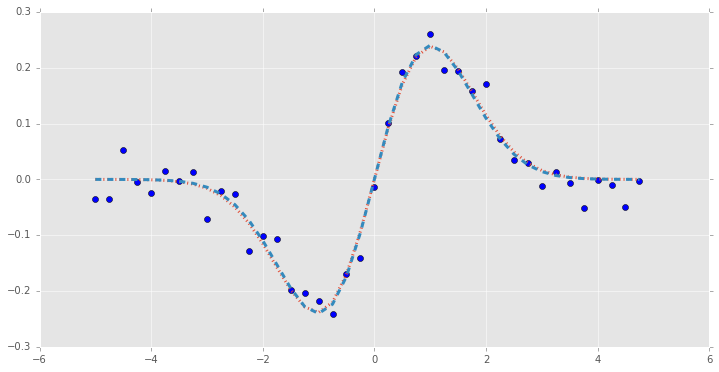

In [221]:
xdata = np.arange(-5, 5, 0.25)
ydataOrig = gen_dipole2(xdata, amp1=1.3, sep1=0.8)
ydataOrigNoisy = ydataOrig + np.random.normal(scale=0.03, size=ydataOrig.shape) ## save it for fitting below...
ydata = ydataOrigNoisy[:len(xdata)] 

result = fitDipole(ydata, xdata, err=0.03, amp1Start=1.5, sep1Start=1.5, fitFunc=gen_dipole, verbose=True)
plt.plot(xdata, ydata, 'bo')
plt.plot(xdata, ydataOrig[:len(xdata)], linewidth=3, linestyle='dotted')
plt.plot(xdata, result.best_fit, linewidth=3, linestyle='dashed')
plt.show()

In [222]:
## Try it with iminuit
iminuit.describe(gen_dipole)

['x', 'amp1', 'sep1']

In [223]:
#err = np.ones(len(xdata)) * 0.03
#chi2 = probfit.Chi2Regression(gen_dipole, xdata, ydata, err)
chi2 = Chi2Functor(gen_dipole, xdata, ydata, err=0.03)
iminuit.describe(chi2)

['amp1', 'sep1']

In [224]:
# minimize it
# yes, it gives you a heads up that you didn't give it initial value
# we can ignore it for now
# see iminuit tutorial on how to give initial value/range/error
minuit = iminuit.Minuit(chi2, amp1=1.5, sep1=1.5, limit_amp1=(0.01,100.) )
_ = minuit.migrad(); # MIGRAD is a very stable robust minimization method
# you can look at your terminal to see what it is doing;

FCN = 34.0507125669 
 TOTAL NCALL = 189 
 NCALLS = 189 
 
 
 EDM = 4.27706129603e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,amp1,2.405820e+00,1.521730e+00,0.000000e+00,0.000000e+00,0.01,100.0,
2,sep1,4.190614e-01,2.713747e-01,0.000000e+00,0.000000e+00,,,


In [225]:
# The output above is a pretty-printed summary of the fit results from
# minuit.print_fmin()
# which was automatically called by iminuit.Minuit.migrad() after running MIGRAD.

# Let's see our results as Python dictionaries ...
print(minuit.values)
print(minuit.errors)

{'sep1': 0.41906141354726, 'amp1': 2.4058203938382117}
{'sep1': 0.27137465774484726, 'amp1': 1.521730429216667}


In [226]:
# Let's visualize our line
_ = chi2.draw(minuit);
# looks good;

AttributeError: Chi2Functor instance has no attribute 'draw'

iMinuit with custom vectorization is about 2.2x slower!

In [228]:
import warnings
warnings.filterwarnings('ignore')

err2 = np.repeat(0.03,len(xdata))

def func_time_iminuit(opt=1):
    chi2 = None
    if opt == 0:
        chi2 = probfit.Chi2Regression(gen_dipole, xdata, ydata, err2)
    elif opt == 1:
        chi2 = Chi2Functor(gen_dipole, xdata, ydata, err=0.03)
    minuit = iminuit.Minuit(chi2, amp1=1.5, sep1=1.5, pedantic=False, print_level=0)
    _ = minuit.migrad()
    return None
val1 = %timeit -o func_time_iminuit(1)
val1a = %timeit -o func_time_iminuit(0)
val2 = %timeit -o fitDipole(ydata, xdata, err=0.03, amp1Start=1.5, sep1Start=1.5, fitFunc=gen_dipole, verbose=False)

gmod = lmfit.Model(gen_dipole, verbose=False)
%timeit gmod.fit(ydata, x=xdata, amp1=1.5, sep1=1.5, verbose=False)

print val2.best/val1.best

10 loops, best of 3: 40 ms per loop
1 loop, best of 3: 1.28 s per loop
100 loops, best of 3: 11.3 ms per loop
100 loops, best of 3: 11.2 ms per loop
0.282946196452


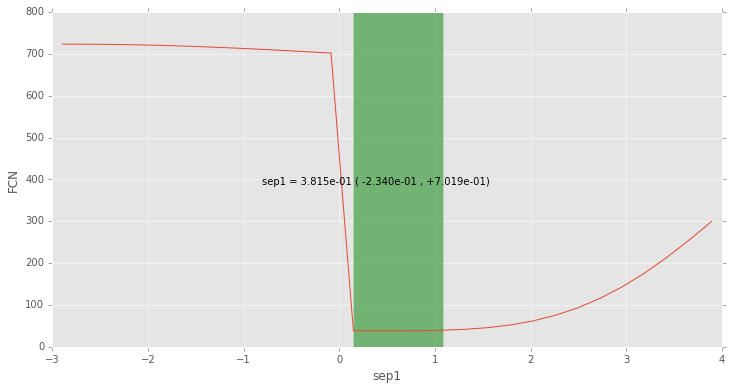

In [133]:
# Looking at a likelihood profile is a good method
# to check that the reported errors make sense
_ = minuit.draw_mnprofile('sep1');

In [134]:
# Plot a 2d contour error
# You can notice that it takes some time to draw
# This is because our PDF is defined in Python
# We will show how to speed this up later
# This is currently uninformative. How to improve?
if False:
    _ = minuit.draw_mncontour('amp1', 'sep1');

Add template and obs. image to constrain fit...

 - Adding parameter "sep1"
 - Adding parameter "amp1"
[[Model]]
    Model(gen_dipole2)
[[Fit Statistics]]
    # function evals   = 15
    # data points      = 120
    # variables        = 2
    chi-square         = 0.088
    reduced chi-square = 0.001
[[Variables]]
    sep1:   0.79239981 +/- 0.025266 (3.19%) (init= 1.5)
    amp1:   1.31542636 +/- 0.017658 (1.34%) (init= 1.5)

         99.70%    95.00%    67.40%    _BEST_    67.40%    95.00%    99.70%
 sep1:  -0.07526  -0.04942  -0.02474   0.79240  +0.02498  +0.05040  +0.07760
 amp1:  -0.05345  -0.03496  -0.01742   1.31543  +0.01743  +0.03500  +0.05353


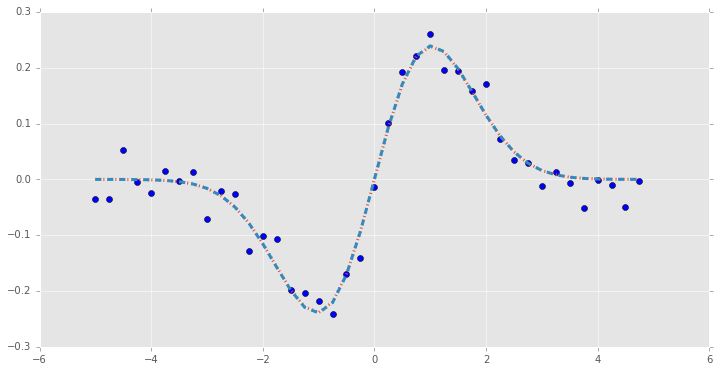

In [231]:
## Use same input data as above for direct comparison
ydata = ydataOrigNoisy
result = fitDipole(ydata, xdata, amp1Start=1.5, sep1Start=1.5, fitFunc=gen_dipole2, verbose=True)
plt.plot(xdata, ydata[:len(xdata)], 'bo')
plt.plot(xdata, ydataOrig[:len(xdata)], linewidth=3, linestyle='dotted')
plt.plot(xdata, result.best_fit[:len(xdata)], linewidth=3, linestyle='dashed')
plt.show()

In [232]:
## Try it with iminuit/probfit.
## probfit requires x (and hence y) to be a 1-d array, so we will have to play around with it
##   to get it to work.
## Here we encode xdata = [x, x+100, x+200] for the diffim, pos, and neg images respectively
def gen_dipole3(x, amp1=1., sep1=1.):
    xx = x
    if x >= 190:
        xx -= 200
    elif x >= 90:
        xx -= 100
    ypos = amp1 * norm.pdf(xx,  sep1/2., 1)
    yneg = amp1 * norm.pdf(xx, -sep1/2., 1)                  
    yout = ypos - yneg
    if x >= 190:
        yout = yneg
    elif x >= 90:
        yout = ypos
    return yout

print iminuit.describe(gen_dipole3)
xdata2 = np.append(xdata, [xdata+100, xdata+200])
ydata2 = ydataOrigNoisy.copy()

chi2 = probfit.Chi2Regression(gen_dipole3, xdata2, ydata2, np.repeat(0.03, len(xdata2)))
print iminuit.describe(chi2)

minuit = iminuit.Minuit(chi2, amp1=1.5, sep1=1.5, limit_amp1=(0.01,100.) )
_ = minuit.migrad();

['x', 'amp1', 'sep1']
['amp1', 'sep1']


FCN = 97.4818415781 
 TOTAL NCALL = 39 
 NCALLS = 39 
 
 
 EDM = 6.6868036934e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,amp1,1.315435e+00,1.942430e-02,0.000000e+00,0.000000e+00,0.01,100.0,
2,sep1,7.923780e-01,2.772554e-02,0.000000e+00,0.000000e+00,,,


In [233]:
## But note that my new Chi2Functor does not require x or y to be 1-d so...
# Try it by defining our own vectorized chi2 function. This should be faster.
chi2 = Chi2Functor(gen_dipole2, xdata, ydata, err=0.03)
print iminuit.describe(chi2)

minuit = iminuit.Minuit(chi2, amp1=1.5, sep1=1.5, limit_amp1=(0.01,100.) )
_ = minuit.migrad();

['amp1', 'sep1']


FCN = 97.4818415781 
 TOTAL NCALL = 39 
 NCALLS = 39 
 
 
 EDM = 6.68680390213e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,amp1,1.315435e+00,1.942429e-02,0.000000e+00,0.000000e+00,0.01,100.0,
2,sep1,7.923780e-01,2.772554e-02,0.000000e+00,0.000000e+00,,,


{'sep1': 0.7923780400072157, 'amp1': 1.3154345092288853}
{'sep1': 0.027725538883315196, 'amp1': 0.019424294973754308}


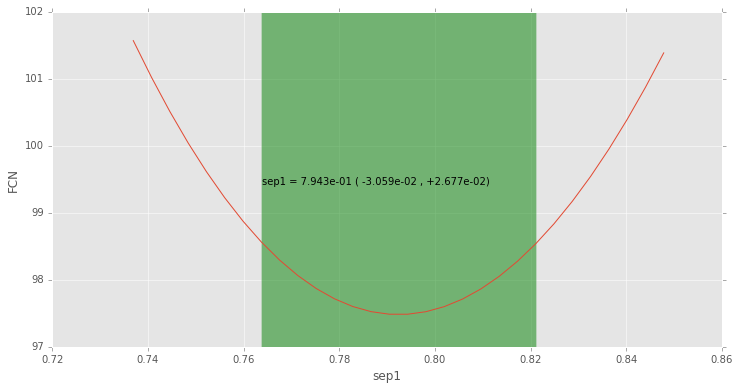

In [234]:
print(minuit.values)
print(minuit.errors)

#_ = chi2.draw(minuit);
# Looking at a likelihood profile is a good method
# to check that the reported errors make sense
_ = minuit.draw_mnprofile('sep1');

OK, for this it's a bit closer - only 1.15x slower

In [246]:
val1 = %timeit -o fitDipole(ydata, xdata, err=0.03, amp1Start=1.5, sep1Start=1.5, \
                            fitFunc=gen_dipole2, verbose=False)

def func_time_iminuit():
    chi2 = Chi2Functor(gen_dipole2, xdata, ydata, err=0.03)
    minuit = iminuit.Minuit(chi2, amp1=1.5, sep1=1.5, pedantic=False, print_level=0)
    _ = minuit.migrad()
    return None
val2 = %timeit -o func_time_iminuit()

err2 = np.repeat(0.03, len(xdata2))

def func_time_iminuit():
    chi2 = probfit.Chi2Regression(gen_dipole3, xdata, ydata, err2)
    minuit = iminuit.Minuit(chi2, amp1=1.5, sep1=1.5, pedantic=False, print_level=0)
    _ = minuit.migrad()
    return None
val2a = %timeit -o func_time_iminuit()

gmod = lmfit.Model(gen_dipole2, verbose=False)
%timeit gmod.fit(ydata, x=xdata, weights=1/0.03, amp1=1.5, sep1=1.5, verbose=False)

print val1.best/val2.best

100 loops, best of 3: 4.93 ms per loop
100 loops, best of 3: 5.82 ms per loop
1 loop, best of 3: 1.3 s per loop
100 loops, best of 3: 5.09 ms per loop
0.847388568007


### A nicer way:

Let's try doing this with `probfit.costfunc.SimultaneousFit`.

Note this is SLOW because it does not vectorize the function calls.

In [247]:
def gen_posImage(x, amp1=1., sep1=1.):
    ypos = amp1 * norm.pdf(x,  sep1/2., 1)
    return ypos

def gen_negImage(x, amp1=1., sep1=1.):
    yneg = amp1 * norm.pdf(x, -sep1/2., 1)
    return yneg

def gen_dipole3(x, amp1=1., sep1=1.):
    ypos = gen_posImage(x, amp1, sep1)
    yneg = gen_negImage(x, amp1, sep1)
    yout = ypos - yneg
    return yout

print iminuit.describe(gen_dipole3)
xdata2 = xdata.copy()
ydata2 = ydataOrigNoisy.copy()
err = np.ones_like(xdata2) * 0.03

poschi2 = probfit.Chi2Regression(gen_posImage, xdata2, ydata2[40:80],    err)
negchi2 = probfit.Chi2Regression(gen_negImage, xdata2, ydata2[80:120],  err)
difchi2 = probfit.Chi2Regression(gen_dipole3,  xdata2, ydata2[:40], err)

simchi2 = probfit.SimultaneousFit(difchi2, poschi2, negchi2)
print probfit.describe(simchi2)

minuit = iminuit.Minuit(simchi2, amp1=1.5, sep1=1.5, limit_amp1=(0.01,100.) )
_ = minuit.migrad();

['x', 'amp1', 'sep1']
['amp1', 'sep1']


FCN = 97.4818415781 
 TOTAL NCALL = 39 
 NCALLS = 39 
 
 
 EDM = 6.68680397871e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,amp1,1.315435e+00,1.942429e-02,0.000000e+00,0.000000e+00,0.01,100.0,
2,sep1,7.923780e-01,2.772554e-02,0.000000e+00,0.000000e+00,,,


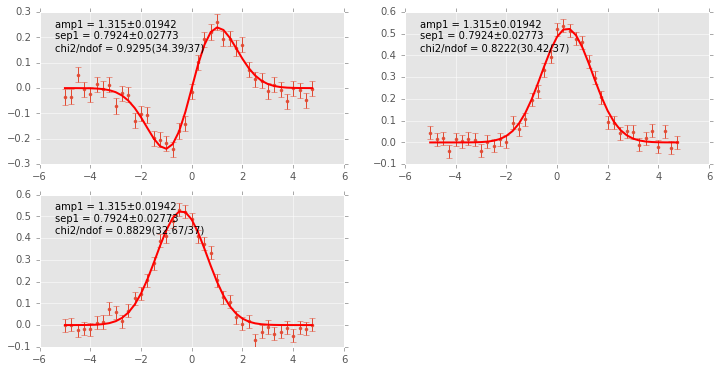

In [248]:
_ = simchi2.draw(minuit);

In [249]:
val1 = %timeit -o fitDipole(ydata, xdata, amp1Start=1.5, sep1Start=1.5, fitFunc=gen_dipole2, verbose=False)
def func_time_iminuit():
    minuit = iminuit.Minuit(chi2, amp1=1.5, sep1=1.5,
                           pedantic=False, print_level=0)
    _ = minuit.migrad()
    return None
val2 = %timeit -o func_time_iminuit()

gmod = lmfit.Model(gen_dipole2, verbose=False)
%timeit gmod.fit(ydata, x=xdata, amp1=1.5, sep1=1.5, verbose=False)

print val1.best/val2.best

100 loops, best of 3: 5.38 ms per loop
100 loops, best of 3: 5.82 ms per loop
100 loops, best of 3: 4.87 ms per loop
0.924001411175


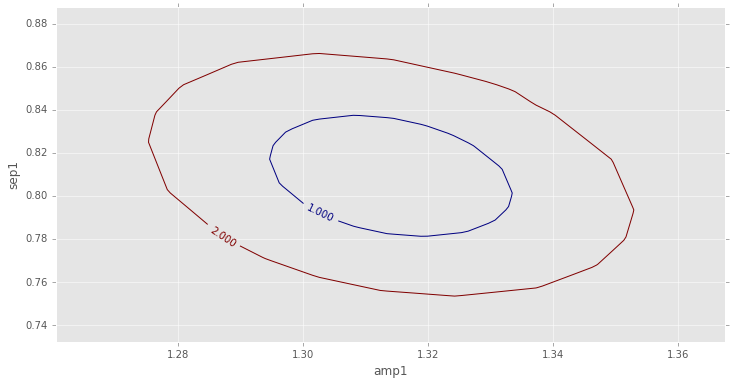

In [31]:
x, y, gridvalue, contour = minuit.draw_mncontour('amp1', 'sep1');

## Try the linear background gradient stuff...

In [273]:
def gen_dipole4(x, amp1=1., sep1=1., bg1=0.5, bgslope1=0.02):
    ypos = bg1 + bgslope1*x + amp1 * norm.pdf(x,  sep1/2., 1)
    yneg = bg1 + bgslope1*x + amp1 * norm.pdf(x, -sep1/2., 1)                  
    y = ypos - yneg
    return np.append(y, [ypos, yneg])

def fitDipole4(ydata, xdata, err=1., amp1Start=3., sep1Start=2., bgslope1start=0., fitFunc=gen_dipole4,
               verbose=False):
    #bg1start = np.median(ydata[len(xdata):])
    gmod = lmfit.Model(fitFunc, verbose=verbose)
    result = gmod.fit(ydata, x=xdata, amp1=amp1Start, sep1=sep1Start, bg1=0., bgslope1=bgslope1start,
                      weights=1./err, verbose=verbose)

    if verbose: 
        print(result.fit_report(show_correl=False))
        ci = lmfit.conf_interval(result, result)
        lmfit.printfuncs.report_ci(ci)

    return result

 - Adding parameter "bg1"
 - Adding parameter "bgslope1"
 - Adding parameter "amp1"
 - Adding parameter "sep1"
[[Model]]
    Model(gen_dipole4)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 120
    # variables        = 4
    chi-square         = 104.751
    reduced chi-square = 0.903
[[Variables]]
    bg1:        0.21683909 +/- 0.013063 (6.02%) (init= 0)
    bgslope1:   0.23729126 +/- 0.003683 (1.55%) (init= 0)
    amp1:       1.26682320 +/- 0.075730 (5.98%) (init= 1.5)
    sep1:       0.76771987 +/- 0.092560 (12.06%) (init= 1.5)

             99.70%    95.00%    67.40%    _BEST_    67.40%    95.00%    99.70%
 bg1     :  -0.03965  -0.02590  -0.01290   0.21684  +0.01289  +0.02587  +0.03958
 bgslope1:  -0.01117  -0.00730  -0.00363   0.23729  +0.00363  +0.00730  +0.01117
 amp1    :  -0.22856  -0.14963  -0.07466   1.26682  +0.07490  +0.15060  +0.23084
 sep1    :  -0.26781  -0.17792  -0.09027   0.76772  +0.09437  +0.19453  +0.30700


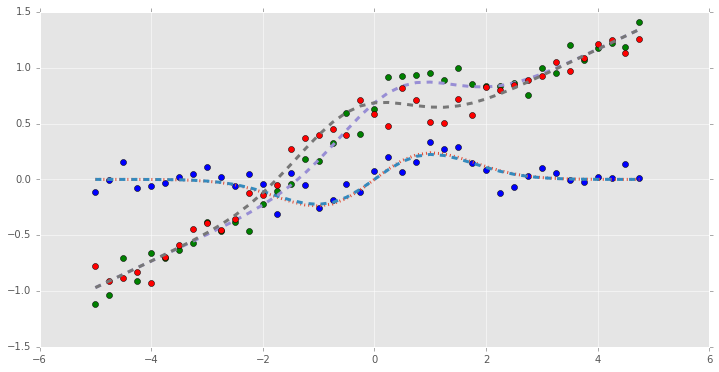

In [274]:
noise = 0.1
ydata = ydataOrig + np.random.normal(scale=noise, size=ydataOrig.shape) ## make it super noisy
ydata[len(xdata):2*len(xdata)] += 0.2 + 0.234*xdata
ydata[2*len(xdata):]           += 0.2 + 0.234*xdata
result = fitDipole4(ydata, xdata, amp1Start=1.5, sep1Start=1.5, fitFunc=gen_dipole4, err=noise, verbose=True)
plt.plot(xdata, ydata[:len(xdata)], 'bo')
plt.plot(xdata, ydataOrig[:len(xdata)], linewidth=3, linestyle='dotted')
plt.plot(xdata, result.best_fit[:len(xdata)], linewidth=3, linestyle='dashed')
plt.plot(xdata, ydata[len(xdata):2*len(xdata)], 'go')
plt.plot(xdata, result.best_fit[len(xdata):2*len(xdata)], linewidth=3, linestyle='dashed')
plt.plot(xdata, ydata[2*len(xdata):], 'ro')
plt.plot(xdata, result.best_fit[2*len(xdata):], linewidth=3, linestyle='dashed')
plt.show()

In [257]:
def gen_slope(x, bg1=0.5, bgslope1=0.02):
    bg = bg1 + bgslope1*x
    return bg

def gen_posImage(x, amp1=1., sep1=1.): #, bg1=0.5, bgslope1=0.02):
    ypos = amp1 * norm.pdf(x,  sep1/2., 1) #+ gen_slope(x, bg1, bgslope1)
    return ypos

def gen_negImage(x, amp1=1., sep1=1.): #, bg1=0.5, bgslope1=0.02):
    yneg = amp1 * norm.pdf(x, -sep1/2., 1) #+ gen_slope(x, bg1, bgslope1)
    return yneg

xdata2 = xdata.copy()
ydata2 = ydata.copy()
err = np.ones_like(xdata2) * noise

factors = [lambda x: 1.0, lambda x: -1.0]   ## factors to make dipole: +1*posImage, and -1*negImage

difchi2 = probfit.Chi2Regression(probfit.AddPdf(gen_posImage, gen_negImage, factors=factors), 
                                 xdata2, ydata2[:40], err)
poschi2 = probfit.Chi2Regression(probfit.AddPdf(gen_slope, gen_posImage), xdata2, ydata2[40:80], err)
negchi2 = probfit.Chi2Regression(probfit.AddPdf(gen_slope, gen_negImage), xdata2, ydata2[80:120], err)
simchi2 = probfit.SimultaneousFit(poschi2, negchi2, difchi2) ## apparently it matters which one comes first!
print probfit.describe(simchi2)
    
bg1start = np.median(ydata[40:])

minuit = iminuit.Minuit(simchi2, amp1=1.5, sep1=1.5, bg1=bg1start, limit_amp1=(0.01,100.) )
_ = minuit.migrad();

['bg1', 'bgslope1', 'amp1', 'sep1']


FCN = 90.0142521252 
 TOTAL NCALL = 119 
 NCALLS = 119 
 
 
 EDM = 4.15476647915e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,bg1,1.943279e-01,1.372928e-02,0.000000e+00,0.000000e+00,,,
2,bgslope1,2.360839e-01,3.876026e-03,0.000000e+00,0.000000e+00,,,
3,amp1,1.355334e+00,7.938142e-02,0.000000e+00,0.000000e+00,0.01,100.0,
4,sep1,7.832377e-01,8.947254e-02,0.000000e+00,0.000000e+00,,,


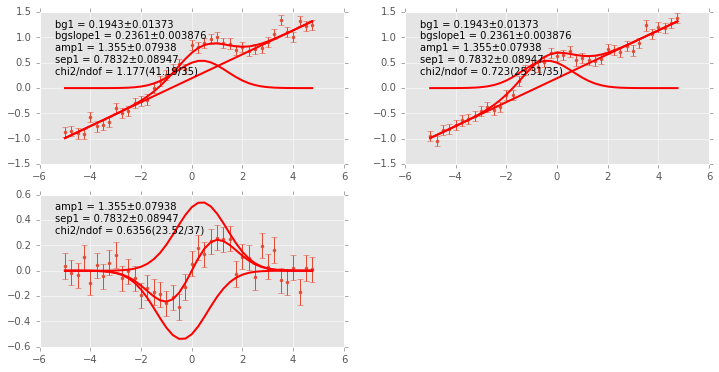

In [258]:
_ = simchi2.draw(minuit, parts=True);

In [288]:
chi2 = Chi2Functor(gen_dipole4, xdata, ydata, err=noise)
minuit = iminuit.Minuit(chi2, amp1=1.5, sep1=1.5, pedantic=False, print_level=1)
_ = minuit.migrad()

FCN = 104.750522423 
 TOTAL NCALL = 104 
 NCALLS = 104 
 
 
 EDM = 1.30397102062e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,amp1,1.266900e+00,7.978369e-02,0.000000e+00,0.000000e+00,,,
2,sep1,7.676609e-01,9.834190e-02,0.000000e+00,0.000000e+00,,,
3,bg1,2.168281e-01,1.375238e-02,0.000000e+00,0.000000e+00,,,
4,bgslope1,2.372927e-01,3.876045e-03,0.000000e+00,0.000000e+00,,,


OK, now we're about 2x slower with iminuit. But note `iminuit` has 103 fcn calls, vs. 23 for `lmfit`.

In [289]:
val1 = %timeit -o result = fitDipole4(ydata, xdata, err=noise, amp1Start=1.5, sep1Start=1.5, \
                                      fitFunc=gen_dipole4, verbose=False)

def func_time_iminuit():
    chi2 = Chi2Functor(gen_dipole4, xdata, ydata, err=noise)
    minuit = iminuit.Minuit(chi2, amp1=1.5, sep1=1.5, pedantic=False, print_level=0)
    _ = minuit.migrad()
    return None
val2 = %timeit -o func_time_iminuit()

def func_time_iminuit():
    minuit = iminuit.Minuit(simchi2, amp1=1.5, sep1=1.5, limit_amp1=(0.01,100.),
                           pedantic=False, print_level=0)
    _ = minuit.migrad()
    return None
val2a = %timeit -o func_time_iminuit()

gmod = lmfit.Model(gen_dipole4, verbose=False)
val3 = %timeit -o gmod.fit(ydata, x=xdata, amp1=1.5, sep1=1.5, bgslope1=0., verbose=False)

print val1.best/val2.best

100 loops, best of 3: 7.04 ms per loop
100 loops, best of 3: 17.7 ms per loop
1 loop, best of 3: 1.16 s per loop
100 loops, best of 3: 6.9 ms per loop
0.397218933478


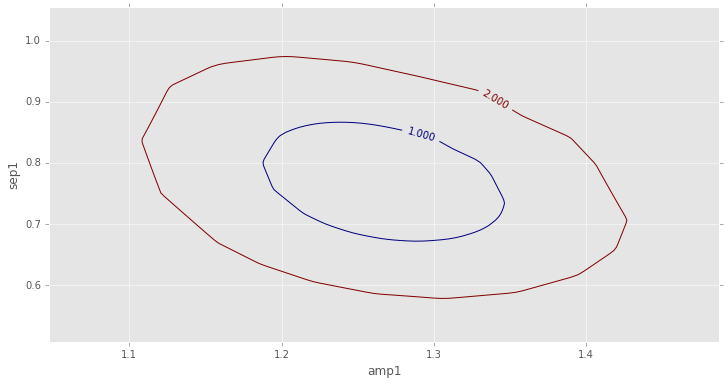

In [278]:
x, y, gridvalue, contour = minuit.draw_mncontour('amp1', 'sep1');

### To do it on a 2-d grid, we need to encode the 2-d pixel coords into a vector.

See: http://programmers.stackexchange.com/questions/212808/treating-a-1d-data-structure-as-2d-grid